In [16]:
from pymongo import MongoClient
import pandas as pd
import matplotlib.pyplot as plt

In [42]:
plt.rcParams["figure.figsize"] = (20,15)
pd.options.display.max_rows = 999

In [2]:
client = MongoClient('localhost', 27017)
db = client.publicru_test
collection = db.documents_collection

In [4]:
collection.count_documents({"t_body": {"$exists": False}})

0

In [85]:
collection.count_documents({"paras_count": {"$exists": True}})

583478

In [ ]:
# "paras_count" - количество параграфов
# "sents_count" - количество предложений
# "words_count" - количество слов
# "vocab_count" - размер словаря
# "hapax_count" - количество слов, используемых только 1 раз в тексте
# "hapax_index" - отношение хапакс к размеру словаря
# "ttr" - отношение размера словаря к количеству слов в тексте
# "sppar" - отношение предложений к абзацам
# "wpsen" - отношения слов к предложениям

In [86]:
df = pd.DataFrame(list(collection.find({}, { 
    "doc_id": 1, 
    "title": 1, 
    "annotation": 1,
    "edition_name": 1,
    "paras_count": 1, 
    "sents_count": 1, 
    "words_count": 1, 
    "vocab_count": 1, 
    "hapax_count": 1, 
    "hapax_index": 1,
    "ttr": 1,
    "sppar": 1,
    "wpsen": 1,
})))

In [87]:
df.head()

,_id,title,annotation,edition_name,doc_id,hapax_count,hapax_index,paras_count,sents_count,sppar,ttr,vocab_count,words_count,wpsen
0,5e7854ebc59124ce04becf39,Эффект слабого рубля,Мы взяли две компании с сопоставимой выручкой ...,РБК Журнал,325,25.0,0.806,1.0,4.0,4.000,0.838,31.0,37.0,9.250
1,5e7854ebc59124ce04becf3a,РОССТАТ,Индексы потребительских цен на товары и услуги...,Российская газета,21225,14.0,0.933,2.0,2.0,1.000,0.938,15.0,16.0,8.000
2,5e7854ebc59124ce04becf3b,Неотложка с планшетом,ЗДОРОВЬЕ . В системе ЕМИАС зарегистрировались ...,Российская газета,21226,118.0,0.776,8.0,25.0,3.125,0.717,152.0,212.0,8.480
3,5e7854ebc59124ce04becf3c,ПРОГНОЗЫ НОМЕРА,К 2017-2018 годам ныне растущий агрокомплекс с...,Эксперт,1638,54.0,0.931,3.0,7.0,2.333,0.935,58.0,62.0,8.857
4,5e7854ebc59124ce04becf3d,ТАНЕЦ НЕНАСТОЯЩЕГО ЛЕБЕДЯ,ПЕРЕД НАМИ КАК БУДТО СЦЕНА ИЗ БАЛЕТА: ДВА МИСТ...,РБК Журнал,2,41.0,0.976,1.0,5.0,5.000,0.977,42.0,43.0,8.600


In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 588456 entries, 0 to 588455
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   _id           588456 non-null  object 
 1   title         588456 non-null  object 
 2   annotation    588451 non-null  object 
 3   edition_name  588456 non-null  object 
 4   doc_id        588456 non-null  int64  
 5   hapax_count   583598 non-null  float64
 6   hapax_index   583598 non-null  float64
 7   paras_count   583598 non-null  float64
 8   sents_count   583598 non-null  float64
 9   sppar         583598 non-null  float64
 10  ttr           583598 non-null  float64
 11  vocab_count   583598 non-null  float64
 12  words_count   583598 non-null  float64
 13  wpsen         583598 non-null  float64
dtypes: float64(9), int64(1), object(4)
memory usage: 62.9+ MB


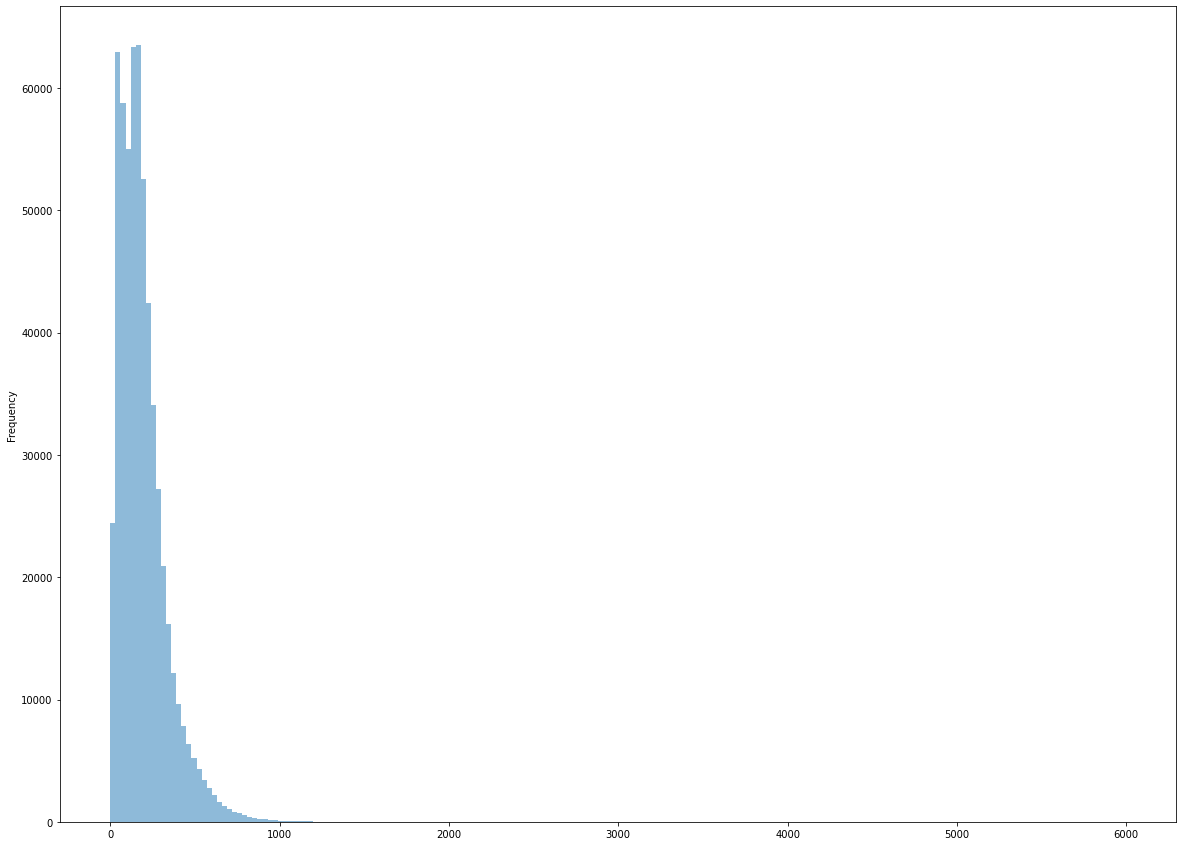

In [89]:
ax = df["hapax_count"].plot.hist(bins=200, alpha=0.5)

In [43]:
df[df["hapax_count"] > 500]

,_id,title,annotation,edition_name,doc_id,hapax_count,hapax_index,paras_count,sents_count,sppar,ttr,vocab_count,words_count,wpsen
39,5e7854ebc59124ce04becf60,Рождественская бизнес-сказка,"На рынке есть условия для того, чтобы средний ...",Эксперт,378,980.0,0.631,84.0,316.0,3.762,0.499,1552.0,3108.0,9.835
46,5e7854ebc59124ce04becf67,СВОЯ ПЕРЕРАБОТКА: КАК ЗНАКОМЫЕ ПУТИНА И СОБЯНИ...,ТЕКСТ: СЕРГЕЙ ТИТОВ. МОЛОДОМУ БИЗНЕСМЕНУ ДМИТР...,РБК Журнал,135,728.0,0.620,79.0,261.0,3.304,0.458,1174.0,2564.0,9.824
47,5e7854ebc59124ce04becf68,КОРПОРАЦИЯ «ТАНЧИКИ»,ИСТОРИЯ WARGAMING НАЧАЛАСЬ В МИНСКОЙ КВАРТИРЕ ...,РБК Журнал,137,816.0,0.687,77.0,214.0,2.779,0.515,1188.0,2308.0,10.785
53,5e7854ebc59124ce04becf6e,НЕФТЕГАЗОВЫЙ ИНТЕРНЕТ,"ФОНД РАЗВИТИЯ ИНТЕРНЕТ-ИНИЦИАТИВ, ПРИДУМАННЫЙ ...",РБК Журнал,138,553.0,0.679,49.0,161.0,3.286,0.493,815.0,1653.0,10.267
134,5e7854ebc59124ce04becfbf,Добро на посадку,Только в «РГ» . Александр Бастрыкин: СКР преде...,Российская газета,21495,535.0,0.629,69.0,160.0,2.319,0.472,851.0,1802.0,11.262
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47796,5e785512c59124ce04bf89ed,Анафилактический шок: 4 ошибки врачей и как их...,ВАЖНОЕ В СТАТЬЕ. 1 Поручите врачу составлять д...,Заместитель главного врача,619398,516.0,0.616,192.0,327.0,1.703,0.465,837.0,1799.0,5.502
47809,5e785512c59124ce04bf89fa,ГДЕ ЛЮБОВЬ,Пройти через развод и остаться человеком. Любо...,Русский Репортер,118634,848.0,0.679,256.0,628.0,2.453,0.516,1249.0,2419.0,3.852
47948,5e785512c59124ce04bf8a85,БАЛАНСИРОВКА НА ГРАНИ,КАК НОВЫЙ АМЕРИКАНСКИЙ СТИЛЬ ВХОДИТ В КЛИНЧ С ...,Огонек,121666,616.0,0.726,33.0,118.0,3.576,0.596,849.0,1425.0,12.076
47986,5e785512c59124ce04bf8aab,Соловецкие ценности,СПЕЦИАЛЬНЫЙ РЕПОРТАЖ. Именно в этом месте пони...,Российская газета. Неделя,122503,526.0,0.786,53.0,231.0,4.358,0.712,669.0,940.0,4.069


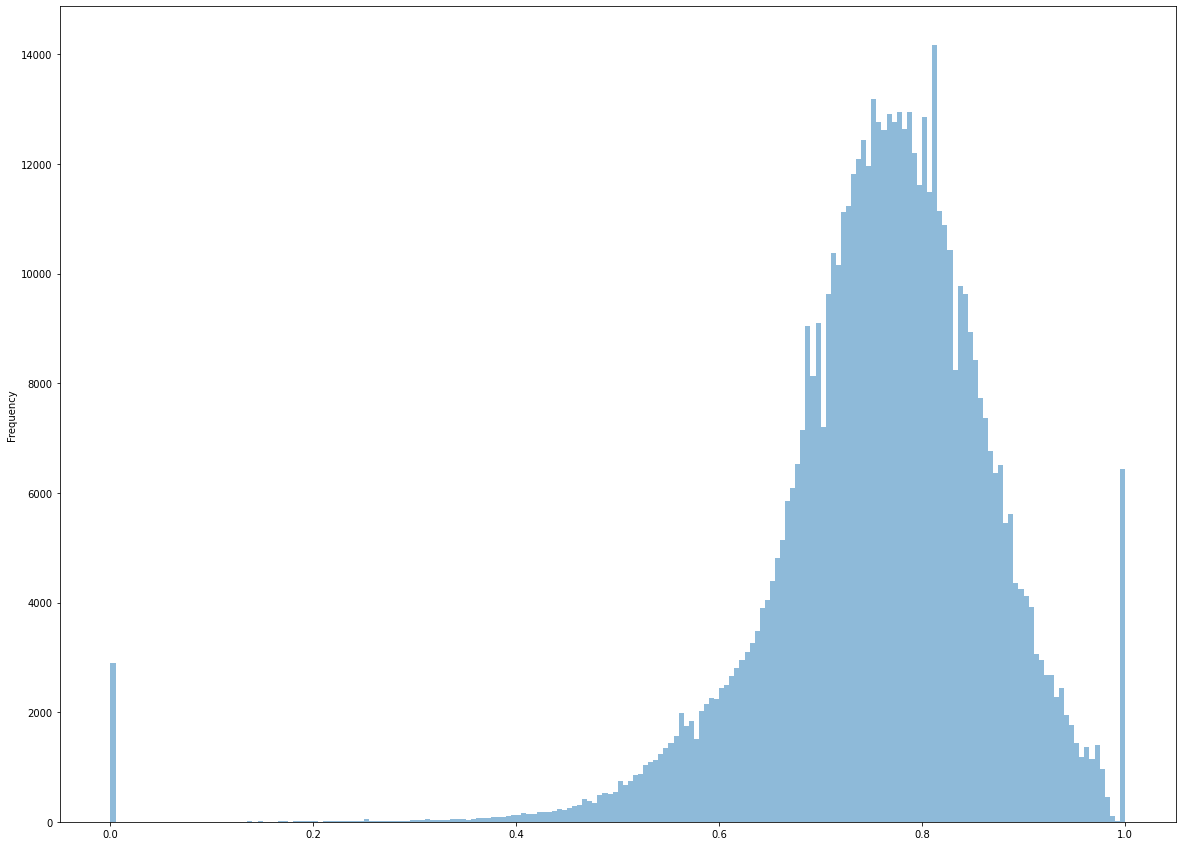

In [90]:
ax = df["hapax_index"].plot.hist(bins=200, alpha=0.5)

In [69]:
df[df["hapax_index"] == 0].head()

,_id,title,annotation,edition_name,doc_id,hapax_count,hapax_index,paras_count,sents_count,sppar,ttr,vocab_count,words_count,wpsen
356,5e7854ebc59124ce04bed09d,«Яблоко» далеко не падает,. .,Компания,3438,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
548,5e7854ebc59124ce04bed15d,Индикаторы,. . . . . . . . . . . . . . . . . . . . . . . .,Коммерсантъ,5610,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
735,5e7854ebc59124ce04bed218,Индикаторы,. . . . . . . . . . . . . . . . . . .,Коммерсантъ,6365,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
793,5e7854ebc59124ce04bed252,200 крупнейших российских банков по размеру чи...,. . . .,Профиль,12039,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
931,5e7854ebc59124ce04bed2dc,NON-STOP | ОПРОС,. .,Московский комсомолец,17960,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [73]:
df[df["hapax_index"] < 0.4].describe()

,doc_id,hapax_count,hapax_index,paras_count,sents_count,sppar,ttr,vocab_count,words_count,wpsen
count,1816.000000,1816.000000,1816.000000,1816.000000,1816.000000,1816.000000,1816.000000,1816.000000,1816.000000,1816.000000
mean,177155.395925,33.227423,0.100678,55.049559,78.910242,0.526557,0.068636,103.118943,1023.331498,4.398723
std,149425.612458,82.706161,0.154327,240.852558,337.194685,1.016120,0.122644,250.293001,4412.207195,7.537832
min,238.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,76266.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,146166.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,251490.500000,27.250000,0.264500,20.000000,30.000000,1.048000,0.117000,90.250000,332.000000,8.811000
max,923158.000000,893.000000,0.399000,5337.000000,8637.000000,11.875000,0.588000,3259.000000,114835.000000,46.844000


In [74]:
df[df["hapax_index"] < 0.4]["words_count"].max()

114835.0

In [79]:
df[df["words_count"] == 114835.0]["title"].values

array(['О перечне, формах и порядке составления и представления форм отчетности кредитных организаций в Центральный банк Российской Федерации'],
      dtype=object)

In [80]:
df[df["words_count"] == 114835.0]["annotation"].values

array(['УКАЗАНИЕ. 24 ноября 2016 года № 4212-У. Зарегистрировано Министерством юстиции Российской Федерации 14 декабря 2016 года .'],
      dtype=object)

In [45]:
df[df["hapax_index"] < 0.5]["edition_name"].value_counts()

Вестник Банка России                                                                     237
Коммерсантъ                                                                              157
Российская газета                                                                         76
Таможенные ведомости                                                                      65
Московский комсомолец                                                                     27
Комсомольская правда                                                                      18
Ценообразование и сметное нормирование в строительстве                                    16
Компания                                                                                  16
Заработная плата. Расчеты. Учет. Налоги                                                   12
Главбух                                                                                   12
Вестник экономического правосудия Российской Федерации                

In [47]:
df[df["hapax_index"] < 0.5]["paras_count"].mean()

72.48009650180941

In [49]:
df[df["hapax_index"] < 0.5]["sents_count"].mean()

115.7816646562123

In [50]:
df[df["hapax_index"] < 0.5]["words_count"].mean()

1431.3088057901086

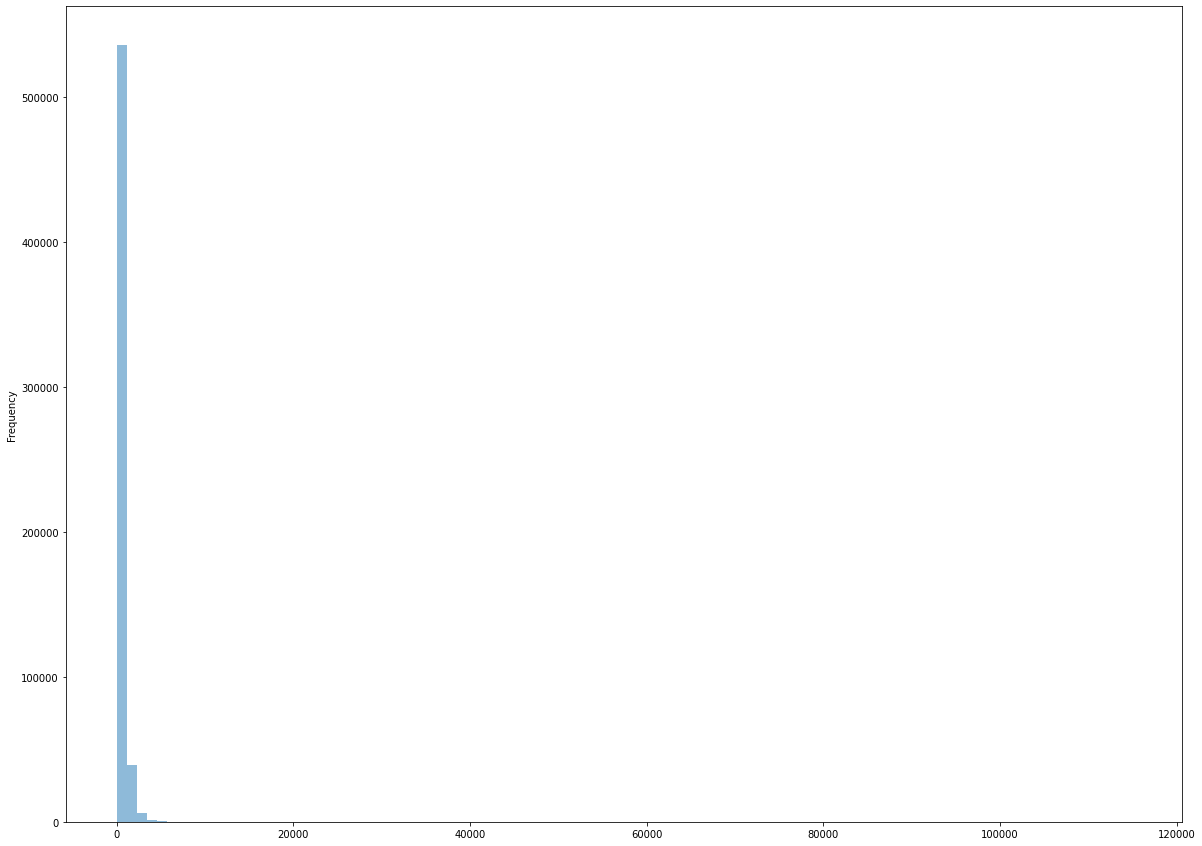

In [91]:
ax = df["words_count"].plot.hist(bins=100, alpha=0.5)

In [54]:
df["words_count"].describe()

count     48000.000000
mean        338.661313
std         814.328985
min           0.000000
25%          87.000000
50%         203.000000
75%         413.000000
max      114835.000000
Name: words_count, dtype: float64